In [ ]:
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

: 

In [9]:
img_array = cv2.imread("Training/3/Training_11204.jpg")

In [10]:
img_array.shape

(48, 48, 3)

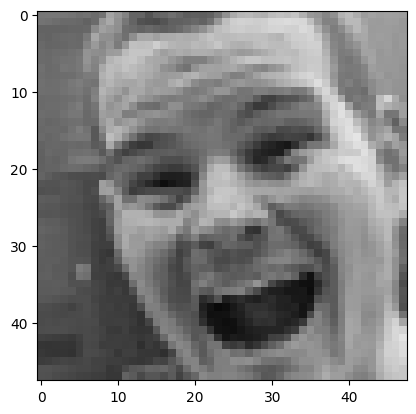

In [11]:
plt.imshow(img_array)

In [12]:
Datadirectory = "Training/"

In [13]:
Classes = ["0","1","2","3","4","5","6"]

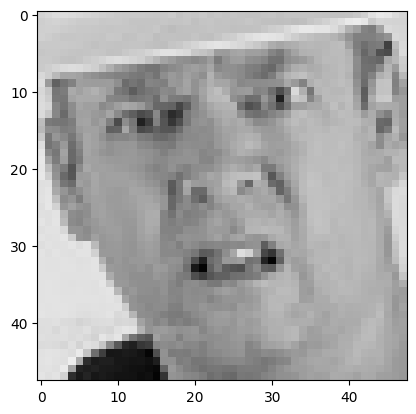

In [14]:
for category in Classes:
    path =os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

    

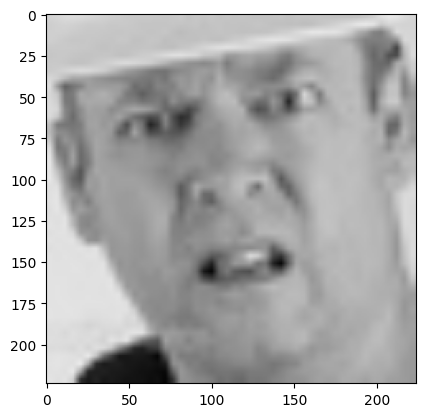

In [15]:
img_size =224
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB)) 
plt.show() 

In [16]:
training_Data =[]
def create_training_Data():
    for category in Classes:
        path =os.path.join(Datadirectory,category)
        class_num = Classes.index(category)
        for  img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [17]:
create_training_Data()

In [18]:
print(len(training_Data))

2235


In [19]:
import random
random.shuffle(training_Data)

In [20]:
x = []  ##data
y = []  ##label

for features,label in training_Data:
    x.append(features)
    y.append(label)

x=np.array(x).reshape(-1,img_size, img_size, 3)

In [21]:
x.shape

(2235, 224, 224, 3)

In [22]:
x= x/255.0;

In [23]:
type(y)

list

In [24]:
Y =np.array(y)

In [25]:
Y.shape

(2235,)

In [26]:
from tensorflow import keras
from tensorflow.keras import layers

In [27]:
model = tf.keras.applications.MobileNetV2()

In [28]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [29]:
base_input = model.layers[0].input

In [30]:
base_output = model.layers[-2].output

In [31]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [32]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation = 'softmax')(final_output)

In [33]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [34]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [35]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [36]:
new_model.compile(loss ="sparse_categorical_crossentropy", optimizer="adam", metrics= ["accuracy"])

In [37]:
new_model.fit(x,Y, epochs=25)

Epoch 1/25
70/70 [==============================] - 347s 5s/step - loss: 1.7467 - accuracy: 0.3275
Epoch 2/25
70/70 [==============================] - 353s 5s/step - loss: 1.3751 - accuracy: 0.4931
Epoch 3/25
70/70 [==============================] - 371s 5s/step - loss: 1.1862 - accuracy: 0.5745
Epoch 4/25
70/70 [==============================] - 371s 5s/step - loss: 1.0557 - accuracy: 0.6143
Epoch 5/25
70/70 [==============================] - 371s 5s/step - loss: 0.8461 - accuracy: 0.6926
Epoch 6/25
70/70 [==============================] - 371s 5s/step - loss: 0.7504 - accuracy: 0.7356
Epoch 7/25
70/70 [==============================] - 371s 5s/step - loss: 0.6109 - accuracy: 0.7808
Epoch 8/25
70/70 [==============================] - 338s 5s/step - loss: 0.5518 - accuracy: 0.8027
Epoch 9/25
70/70 [==============================] - 328s 5s/step - loss: 0.4325 - accuracy: 0.8550
Epoch 10/25
70/70 [==============================] - 328s 5s/step - loss: 0.4491 - accuracy: 0.8532
Epoch 11/

In [38]:
new_model.save('Final_model_95p07.h5')

c:\Users\samad\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [117]:
new_model.fit(x,Y, epochs=5)

Epoch 1/5
70/70 [==============================] - 383s 5s/step - loss: 1.7174 - accuracy: 0.1114
Epoch 2/5
70/70 [==============================] - 365s 5s/step - loss: 1.3975 - accuracy: 0.0903
Epoch 3/5
70/70 [==============================] - 372s 5s/step - loss: 1.1466 - accuracy: 0.1006
Epoch 4/5
70/70 [==============================] - 370s 5s/step - loss: 1.0000 - accuracy: 0.1078
Epoch 5/5
70/70 [==============================] - 371s 5s/step - loss: 0.8369 - accuracy: 0.1176


In [63]:
new_model.save('Final_model_64p43.h5')

In [39]:
new_model =tf.keras.models.load_model('Final_model_95p07.h5')

In [64]:
new_model =tf.keras.models.load_model('Final_model_64p43.h5')

In [80]:
frame = cv2.imread("ai-generated-7790568_1280.jpg")

In [81]:
frame.shape

(1280, 1280, 3)

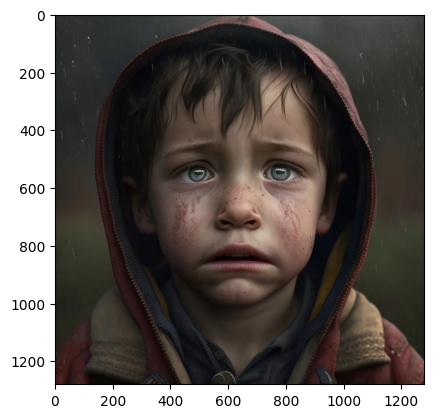

In [82]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [83]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [84]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [85]:
gray.shape

(1280, 1280)

In [86]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face note detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

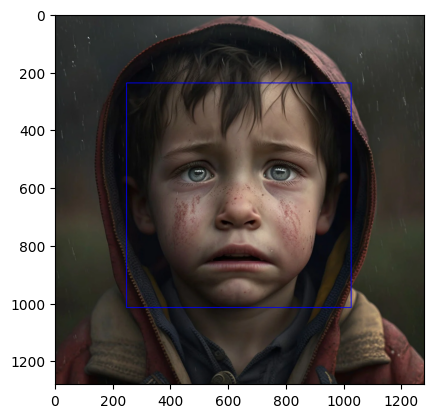

In [87]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

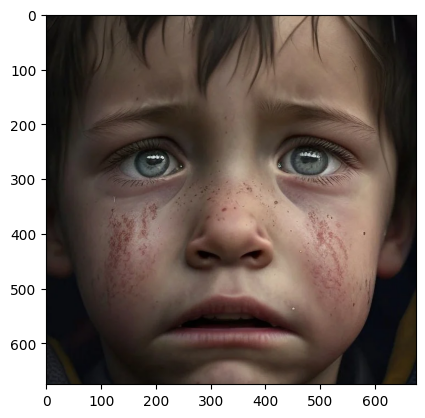

In [88]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [89]:
final_image =cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image,axis= 0)
final_image =final_image/255.0

In [90]:
Predictions = new_model.predict(final_image)

1/1 [==============================] - 0s 66ms/step


In [91]:
Predictions[0]

array([1.7312711e-09, 4.4384878e-09, 2.7137587e-04, 3.3249889e-06,
       4.6103496e-10, 1.8200363e-10, 9.9972528e-01], dtype=float32)

In [92]:
np.argmax(Predictions)

6

In [94]:
import cv2
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
rectangle_bgr = (255,255,255)
img = np.zeros((500,500))
text ="Some text in a box!"
(text_width, text_height) = cv2.getTextSize(text,font, fontScale=font_scale, thickness=1)[0]
text_offset_x =10
text_offset_y = img.shape[0] -25
box_coords =((text_offset_x, text_offset_y),(text_offset_x + text_width +2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale =font_scale, color=(0,0,0), thickness=1)

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap =cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open webcame")

while True:
    ret,frame = cap.read()
    if not ret:
        break
    
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)

    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face note detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex + ew]
    final_image = cv2.resize(face_roi,(224,224))
    final_image = np.expand_dims(final_image,axis= 0)
    final_image =final_image/255.0
    
    font =cv2.FONT_HERSHEY_SIMPLEX
    
    Predictions = new_model.predict(final_image)
    
    font_scale =1.5
    font = cv2.FONT_HERSHEY_PLAIN
    if (np.argmax(Predictions)==0):
        status ="Angry"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,y1),(x1+ w1,y1 + h1),(0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w, y+h),(0,0,255))
    elif (np.argmax(Predictions)==1):
        status ="Disgust"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,y1),(x1+ w1,y1 + h1),(0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w, y+h),(0,0,255))
    elif (np.argmax(Predictions)==2):
        status ="Fear"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,y1),(x1+ w1,y1 + h1),(0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w, y+h),(0,0,255))
    elif (np.argmax(Predictions)==3):
        status ="Happy"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,y1),(x1+ w1,y1 + h1),(0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w, y+h),(0,0,255))
    elif (np.argmax(Predictions)==4):
        status ="Sad"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,y1),(x1+ w1,y1 + h1),(0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w, y+h),(0,0,255))
    elif (np.argmax(Predictions)==5):
        status ="Surprise"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,y1),(x1+ w1,y1 + h1),(0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w, y+h),(0,0,255))
    else:
        status ="Neutral"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,y1),(x1+ w1,y1 + h1),(0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w, y+h),(0,0,255))
        
        
    cv2.imshow('Face Emotion Recognition', frame)
    if cv2.waitKey(2) & 0xFF ==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
    
         

1/1 [==============================] - 0s 76ms/step
